In [ ]:
SELECT
  sub_a,
  sub_b,
  people,
FROM (
  SELECT
    sub_a,
    sub_b,
    people,
    COUNT(*) OVER(PARTITION BY sub_a) 
  FROM (
    SELECT
      a.subreddit sub_a,
      b.subreddit sub_b,
      COUNT(*) people
    FROM (
      SELECT
        author,
        subreddit,
        authors
      FROM
        FLATTEN((
          SELECT
            UNIQUE(author) author,
            a.subreddit subreddit,
            FIRST(authors) authors
          FROM
            [fh-bigquery:reddit_comments.2019_07] a
          JOIN
            [fh-bigquery:reddit_comments.subr_rank_201505] b
          ON
            a.subreddit=b.subreddit
          GROUP EACH BY
            2 ),
          author) ) a
    JOIN EACH (
      SELECT
        author,
        subreddit
      FROM
        FLATTEN((
          SELECT
            UNIQUE(author) author,
            subreddit
          FROM
            [fh-bigquery:reddit_comments.2019_07]
          WHERE
            subreddit IN (
            SELECT
              subreddit
            FROM
              [fh-bigquery:reddit_comments.subr_rank_201505] )
          GROUP BY
            2 ),
          author) ) b
    ON
      a.author=b.author
    WHERE
      a.subreddit!=b.subreddit
      AND ( (a.subreddit='vegan' AND b.subreddit='nfl') OR (a.subreddit ='vegan' AND b.subreddit = 'nba') 
      OR (a.subreddit = 'vegan' AND b.subreddit = 'Boxing') OR (a.subreddit = 'vegan' AND b.subreddit = 'baseball') OR (a.subreddit = 'vegan' AND b.subreddit = 'soccer'))
      OR (a.subreddit = 'vegan' AND b.subreddit = 'Conservative') OR (a.subreddit = 'vegan' AND b.subreddit = 'Liberal') OR (a.subreddit = 'vegan' AND b.subreddit = 'programming') 
      OR (a.subreddit = 'vegan' AND b.subreddit = 'datascience')
    GROUP EACH BY
      1,
      2 ) )
ORDER BY
  people DESC
    
#This is the sql query I used

In [2]:
import pandas as pd
df = pd.read_csv('veganpoliticssports.csv')
df.head()

,sub_a,sub_b,people
0,vegan,nba,304
1,vegan,soccer,247
2,vegan,Conservative,131
3,vegan,nfl,109
4,vegan,baseball,109


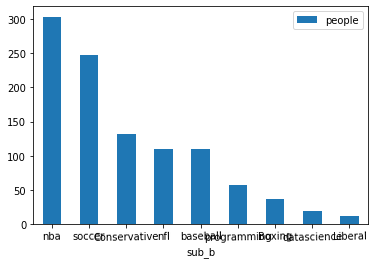

In [5]:
ax = df.plot.bar(x='sub_b', y='people', rot=1)
ax

In [ ]:
# i need to do this with more data samples ( I only used July 2019 data) I also need to include author counts for the subs in order to normalize the data
#I want to test the null hypothesis that vegans on reddit aren't on r/conservative as they r/liberal. According to my sample, there is WAY MORE conservative crossover than there is liberal, even though r/conservative only has around 3 times more subscribers 